### Table of Content
✅ Step 1: Setup & Load Data

✅ Step 2: Data Cleaning

✅ Step 3: Feature Engineering

✅ Step 4: Exploratory Data Analysis (EDA)


✅ Step 4: Data Visualization

✅ Step 5: Insights & Recommendations



## Setup and load data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

Saving Dataset.csv to Dataset.csv


In [8]:
# Now iterate through the uploaded files
for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")
    df = pd.read_csv(filename)
    display(df.head())

Uploaded file: Dataset.csv


,OrderID,Date,CustomerID,Product,Quantity,Price,Total
0,1,2024-04-12,C002,Phone,1,600,642.09
1,2,2024-12-14,C003,Laptop,2,1000,2098.39
2,3,2024-09-27,C017,Monitor,1,200,196.34
3,4,2024-04-16,C005,Phone,3,600,1955.86
4,5,2024-03-12,C017,Laptop,1,1000,1098.19


## Data Cleaning

In [9]:
# Check for missing values
print(df.isnull().sum())


OrderID        0
Date           0
CustomerID     0
Product       10
Quantity       0
Price          0
Total          6
dtype: int64


In [10]:
# Handle missing values if any
df = df.dropna()  # or use fillna()

In [11]:
# Check for missing values
print(df.isnull().sum())


OrderID       0
Date          0
CustomerID    0
Product       0
Quantity      0
Price         0
Total         0
dtype: int64


In [12]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Ensure correct types
df['Quantity'] = df['Quantity'].astype(int)
df['Price'] = df['Price'].astype(float)
df['Total'] = df['Total'].astype(float)


## ✅ Step 3: Feature Engineering

In [13]:
# Extract useful time features
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()
df['Year'] = df['Date'].dt.year


## ✅ Step 4: Exploratory Data Analysis (EDA)

1. Basic Metrics

In [14]:
print("Total Sales: $", df['Total'].sum())
print("Total Orders:", df['OrderID'].nunique())
print("Total Customers:", df['CustomerID'].nunique())


Total Sales: $ 171641.47
Total Orders: 185
Total Customers: 20


2. Sales Over Time

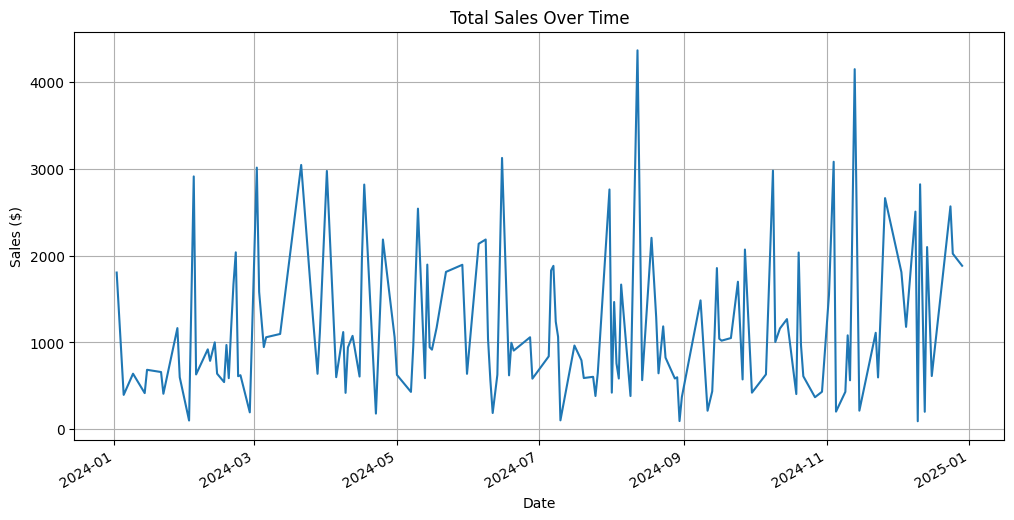

In [15]:
sales_over_time = df.groupby('Date')['Total'].sum()
sales_over_time.plot(figsize=(12, 6), title='Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.grid()
plt.show()


3. Top Products

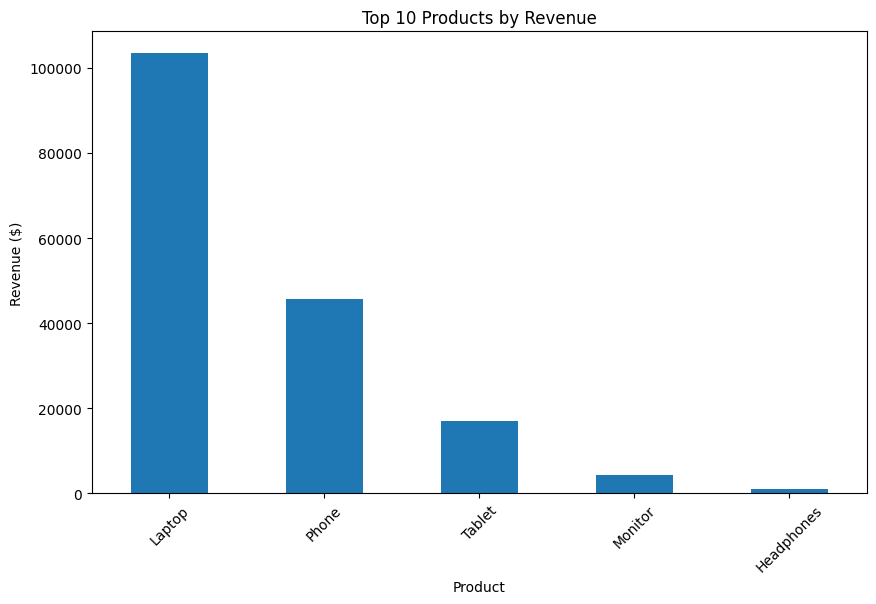

In [16]:
top_products = df.groupby('Product')['Total'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title='Top 10 Products by Revenue', figsize=(10, 6))
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.show()


4. Monthly Sales Trend

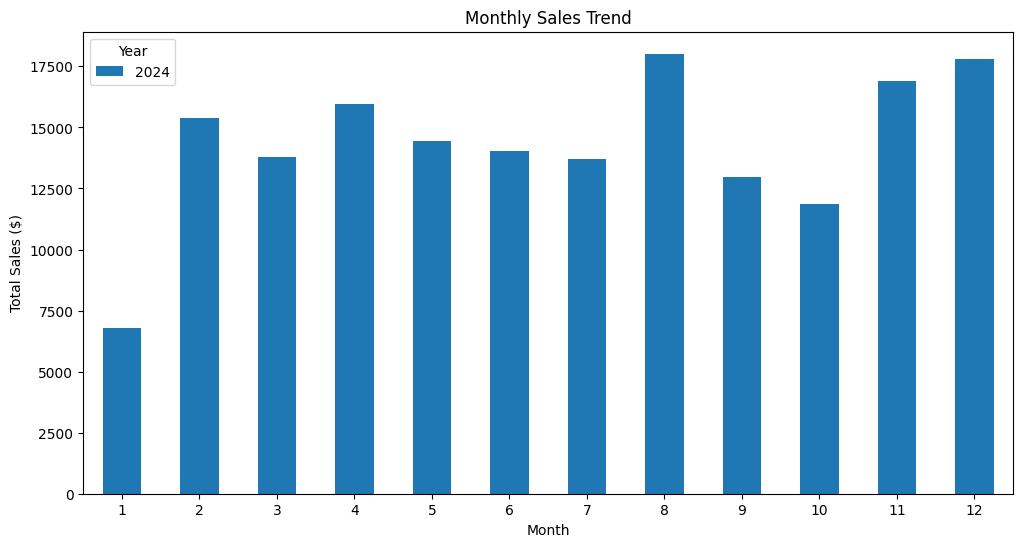

In [17]:
monthly_sales = df.groupby(['Year', 'Month'])['Total'].sum().unstack()
monthly_sales.T.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales ($)')
plt.xlabel('Month')
plt.xticks(rotation=0)
plt.show()


5. Sales by Weekday

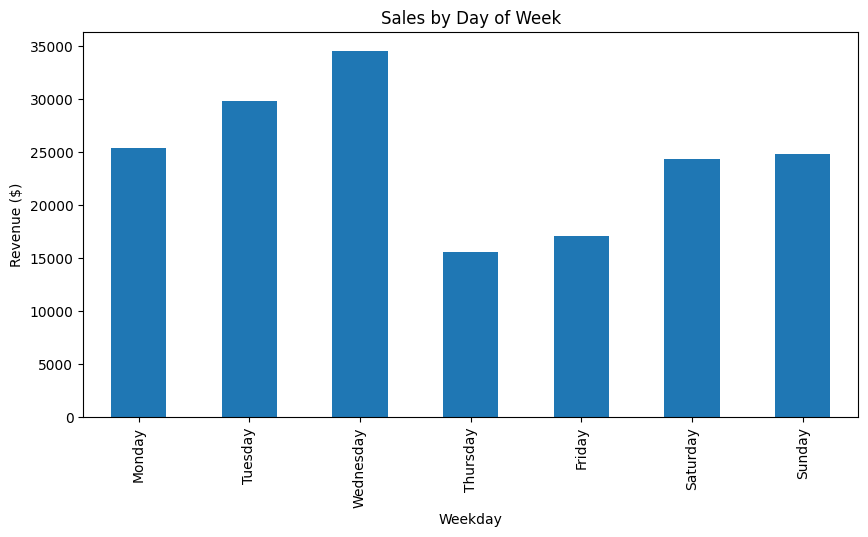

In [18]:
weekday_sales = df.groupby('Weekday')['Total'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
weekday_sales.plot(kind='bar', title='Sales by Day of Week', figsize=(10, 5))
plt.ylabel('Revenue ($)')
plt.show()



📦 6. Sales Distribution (Histogram)

<ipython-input-19-1020862837>:6: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


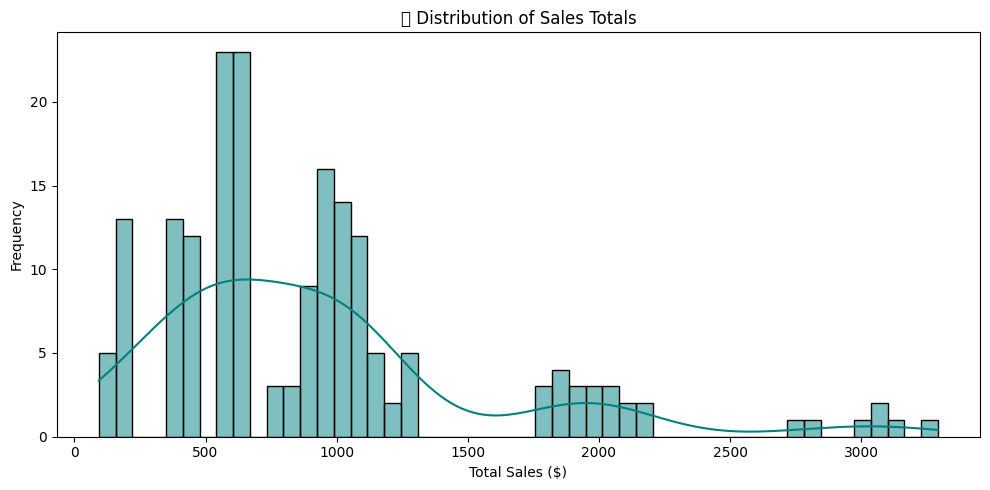

In [19]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Total'], bins=50, kde=True, color='teal')
plt.title('💰 Distribution of Sales Totals')
plt.xlabel('Total Sales ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


### ✅ Step 5: Insights & Recommendations

#**📊 Executive Summary**


This sales data analysis has uncovered key patterns in product performance, temporal sales trends, and customer purchasing behaviors. These insights are valuable for optimizing inventory, marketing campaigns, and overall business operations.



🔍 Key Insights and Recommendations


**1. Sales Over Time**
Insight: Sales fluctuated throughout the year with multiple noticeable peaks.

Recommendation: Investigate causes behind peak sales (e.g., promotions, holidays) and replicate successful strategies during slow months. A calendar-based sales plan can help align marketing efforts with peak periods.

**2. Top Products by Revenue**

Insight: A small number of products (especially Laptops and Phones) contribute the majority of revenue.

#Recommendation:

Prioritize inventory and promotional efforts on high-performing products.

Consider bundling or upselling accessories for these products to increase average order value.


**3. Monthly Sales Trends**

Insight: August and December recorded the highest total monthly sales.

Recommendation: Leverage seasonal demand during these months by launching targeted campaigns and ensuring optimal stock availability. August may represent back-to-school buying and December likely aligns with holiday shopping.


**4. Sales by Day of the Week**

Insight: Wednesday had the highest revenue, followed by Tuesday and Monday.

# Recommendation:

Launch mid-week flash sales or promotions to capitalize on strong traffic.

Explore strategies to boost Thursday and Friday sales, such as payday promotions or discounts.

**5. Sales Distribution**

Insight: Most sales transactions fall under the $500–$1500 range, with a long tail of high-value purchases.

#Recommendation:

Offer financing options or installment plans for higher-priced products.

Introduce volume discounts or loyalty perks to encourage larger purchases.

##📦 Operational Recommendations
* Monitor stock levels of high-revenue items to avoid stockouts.

* Apply predictive models to forecast peak demand periods.

* Segment customers by purchase size and frequency for targeted retention strategies.